In [ ]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1'
import torch
import numpy as np
import random
from utils import (
    get_clf_names_and_list,
    uncertainty_guidance_generate,
    controversial_guidance_generate
)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# set random seed
random_seed = 42
torch.manual_seed(random_seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(random_seed)
    torch.cuda.manual_seed_all(random_seed)
random.seed(random_seed)
np.random.seed(random_seed)
torch.cuda.manual_seed(random_seed)   

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False 

In [ ]:
# build the list for classifiers anf classifier names
clf_list, clf_names = get_clf_names_and_list()

/mnt/dataset0/weichen/projects/chi/CoCoG/HumanPerceptualVariability/utils.py:267: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  diffusion_prior.load_state_dict(torch.load(f'

generating with vit


50it [00:07,  6.81it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.0038811937..1.0].


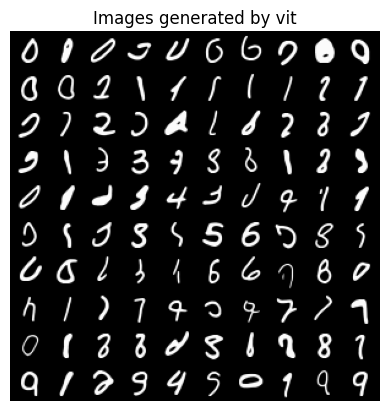

In [ ]:
num_samples = 100

uncertainty_guidance_generate(
    num_samples,
    clf_list[0],
    clf_names[0],
    device=device
)

# targeted controversial sampling

/mnt/dataset0/weichen/projects/chi/CoCoG/HumanPerceptualVariability/utils.py:308: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  diffusion_prior.load_state_dict(torch.load(f'

generating with vgg and cornet


50it [00:05,  9.82it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.0033304726..1.0].


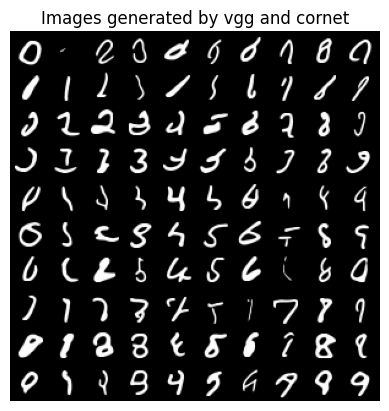

In [5]:
controversial_guidance_generate(num_samples,clf_list[1],clf_list[2],clf_names[1],clf_names[2],device=device)